# Actividad Final 5.11

Una cámara frigorífica funciona con una temperatura de condensación de 40 °C y de evaporación de -10 °C. En el compresor, la temperatura de descarga es de 56 °C. Dibuja los puntos en el diagrama del R134a y calcula:
- El calor absorbido por el refrigerante.
- El calor eliminando en el condensador.
- La potencia frigorífica siendo el caudal 0,02 kg/s.
- El equivalente térmico del trabajo total de compresión.
- El EER.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pyromat as pm
pm.config["unit_pressure"] = "kPa"
pm.config["def_p"] = 100

El punto 1 tendrá el valor de la presión de evaporación y temperatura de evaporación saturada de líquido. Una vez obtenido el punto sobre el diagrama anotamos los valores de entropía y entalpía.

Entalpía del punto 1: 392.7 kJ/kg
Entropía del punto 1: 1.7334 kJ/kg


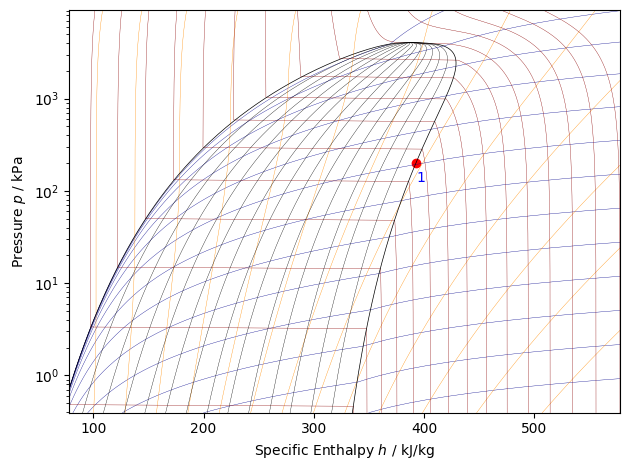

In [5]:
mp_R134a = pm.get("mp.C2H2F4")
T1 = -10 + 273.15 # K <--given
h1 = mp_R134a.hs(T=T1)[1]
s1 = mp_R134a.ss(T=T1)[1]
print(f"Entalpía del punto 1: {round(float(h1),1)} kJ/kg")
print(f"Entropía del punto 1: {round(float(s1),4)} kJ/kg")

import CoolProp
from CoolProp.Plots import PropertyPlot
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = 392.7, y = 200.6, color='r')
ax.text(h1, 125, '1', fontsize=10, rotation=0, color='b')
plot.show()


El punto 2 tendrá el valor de la presión de condensación y la temperatura de descarga de 56º C. Este valor de temperatura implica que la compresión no sea isoentrópica. 

Presión punto 2: 1016.5 KPa
Entalpía del punto 2: 437.0 kJ/kg
Temperatura del punto 2: 56.0 ºC


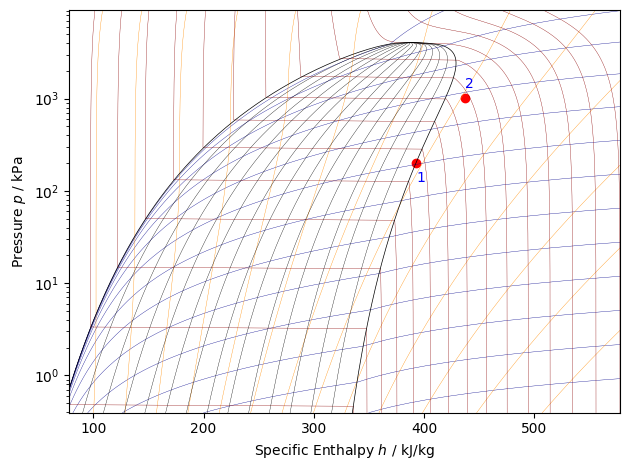

In [7]:
T3 = 40 +273.15 # K <--given
p_g = mp_R134a.ps(T=T3)
T2 = 56+273.15
h2 = mp_R134a.h(T=T2, p=p_g)
print(f"Presión punto 2: {round(float(p_g),1)} KPa")
print(f"Entalpía del punto 2: {round(float(h2),1)} kJ/kg")
print(f"Temperatura del punto 2: {round(float(T2-273.15),1)} ºC")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = [392.7,437.0], y = [200.6,1016.5], color='r')
ax.text(h1,125, '1', fontsize=10, rotation=0, color='b')
ax.text(h2,1300, '2', fontsize=10, rotation=0, color='b')
plot.show()

El punto 3 tendrá el valor de la presión de condensación y la temperatura de condensación. Una vez dibujado, obtenemos la entalpía.

Presión punto 3: 1016.5 KPa
Entalpía del punto 3: 256.4 kJ/kg


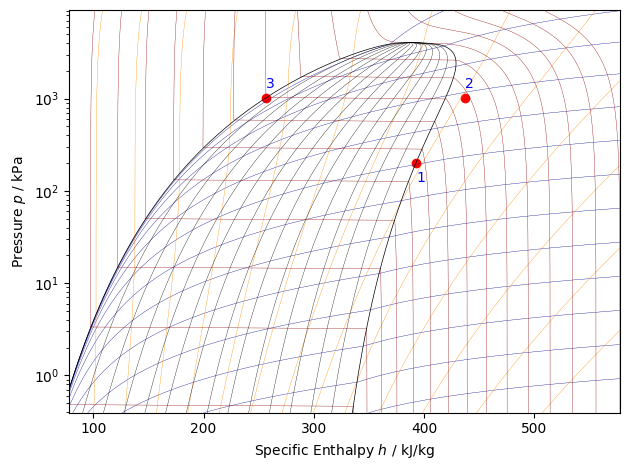

In [10]:
p_g = mp_R134a.ps(T=T3)
print(f"Presión punto 3: {round(float(p_g),1)} KPa")
h3 = mp_R134a.hs(T=T3)
print(f"Entalpía del punto 3: {round(float(h3[0]),1)} kJ/kg")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = [392.7,437.0,256.4], y = [200.6,1016.5,1016.5], color='r')
ax.text(h1,125, '1', fontsize=10, rotation=0, color='b')
ax.text(h2,1300, '2', fontsize=10, rotation=0, color='b')
ax.text(h3[0],1300, '3', fontsize=10, rotation=0, color='b')
plot.show()

El punto 4 tendrá el valor de la entalpía del punto 3 y la presión y temperatura de evaporación.

Presión punto 4: 200.6 KPa
Entalpía del punto 4: 256.4 kJ/kg


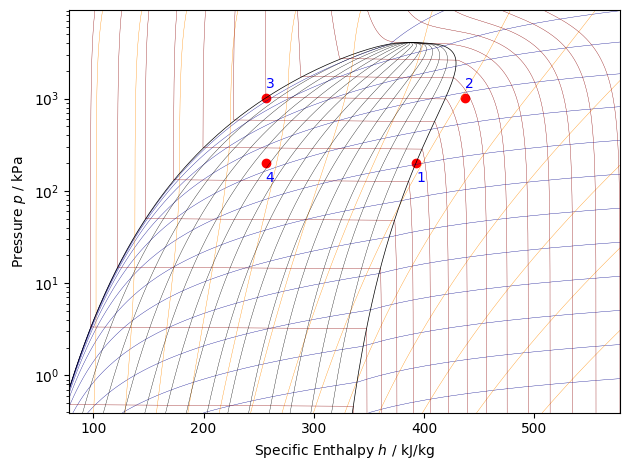

In [13]:
h4 = h3
P4 = mp_R134a.ps(T=T1)
print(f"Presión punto 4: {round(float(P4),1)} KPa")
print(f"Entalpía del punto 4: {round(float(h3[0]),1)} kJ/kg")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = [392.7,437.0,256.4,256.4], y = [200.6,1016.5,1016.5,200.6], color='r')
ax.text(h1,125, '1', fontsize=10, rotation=0, color='b')
ax.text(h2,1300, '2', fontsize=10, rotation=0, color='b')
ax.text(h3[0],1300, '3', fontsize=10, rotation=0, color='b')
ax.text(h4[0],125, '4', fontsize=10, rotation=0, color='b')
plot.show()

Resumiento el ciclo frigorífico estará formado por los siguientes puntos:

In [46]:
print(f"Presión punto 1: {round(float(P4),1)} KPa")
print(f"Entalpía del punto 1: {round(float(h1),1)} kJ/kg")
print(f"Presión punto 2: {round(float(p_g),1)} KPa")
print(f"Entalpía del punto 2: {round(float(h2),1)} kJ/kg")
print(f"Presión punto 3: {round(float(p_g),1)} KPa")
print(f"Entalpía del punto 3: {round(float(h3[0]),1)} kJ/kg")
print(f"Presión punto 4: {round(float(P4),1)} KPa")
print(f"Entalpía del punto 4: {round(float(h3[0]),1)} kJ/kg")

Presión punto 1: 200.6 KPa
Entalpía del punto 1: 392.7 kJ/kg
Presión punto 2: 1016.5 KPa
Entalpía del punto 2: 437.0 kJ/kg
Presión punto 3: 1016.5 KPa
Entalpía del punto 3: 256.4 kJ/kg
Presión punto 4: 200.6 KPa
Entalpía del punto 4: 256.4 kJ/kg


El calor abosobido por el refrigerante será:
$$Q_{absorbido}=h_{1}-h_{4}$$

Calor absorbido por el refrigerante: 136.3 kJ/kg


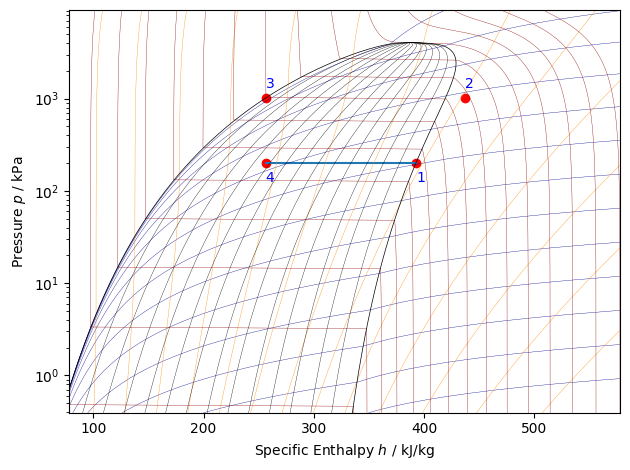

In [14]:
q_L = h1 - h4
print(f"Calor absorbido por el refrigerante: {round(float(q_L[0]),1)} kJ/kg")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = [392.7,437.0,256.4,256.4], y = [200.6,1016.5,1016.5,200.6], color='r')
ax.plot([256.4,392.7],[200.6,200.6])
ax.text(h1,125, '1', fontsize=10, rotation=0, color='b')
ax.text(h2,1300, '2', fontsize=10, rotation=0, color='b')
ax.text(h3[0],1300, '3', fontsize=10, rotation=0, color='b')
ax.text(h4[0],125, '4', fontsize=10, rotation=0, color='b')
plot.show()

El calor eliminaado en el condensador será:
$$Q_{eliminado}=h_{2}-h_{3}$$

Calor eliminado en el condensador: 180.6 kJ/kg


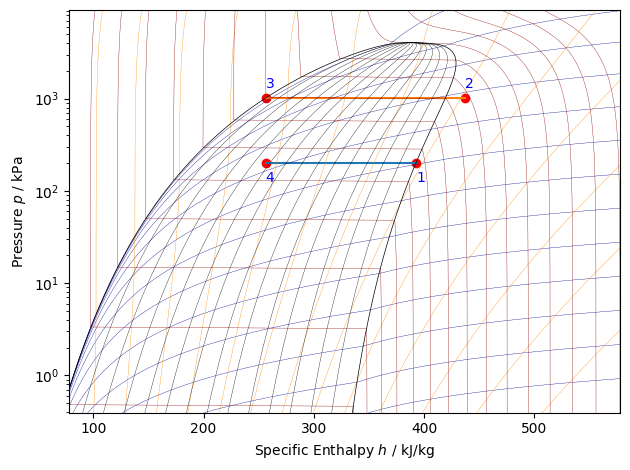

In [15]:
q_H = h2 -h3
print(f"Calor eliminado en el condensador: {round(float(q_H[0]),1)} kJ/kg")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = [392.7,437.0,256.4,256.4], y = [200.6,1016.5,1016.5,200.6], color='r')
ax.plot([256.4,392.7],[200.6,200.6])
ax.plot([437.0,256.4],[1016.5,1016.5])
ax.text(h1,125, '1', fontsize=10, rotation=0, color='b')
ax.text(h2,1300, '2', fontsize=10, rotation=0, color='b')
ax.text(h3[0],1300, '3', fontsize=10, rotation=0, color='b')
ax.text(h4[0],125, '4', fontsize=10, rotation=0, color='b')
plot.show()

La potencia frigorífica será: 
$$\dot{Q}=\dot{m}*Q_{absorbido}$$

In [53]:
m_dot = 0.02
print(f"Potencia frigorífica: {round(float(q_L[0]*m_dot),2)} kW")


Potencia frigorífica: 2.73 kW


El equivalente térmico del trabajo total de compresión.
$$W_{compresor}=h_{2}-h_{1}$$

Equivalente térmico del trabajo del compresor: 44.3 kJ/kg


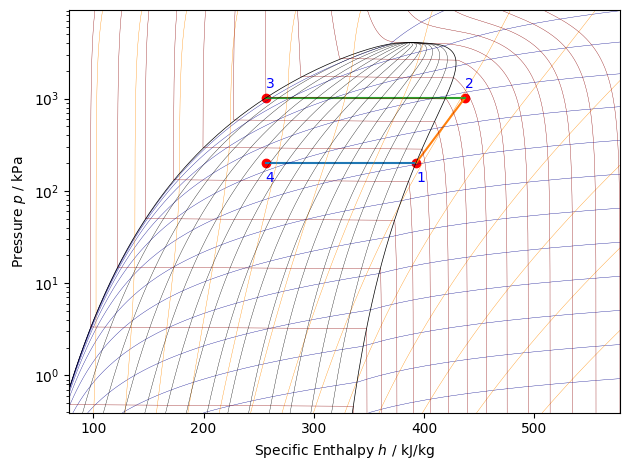

In [16]:
w_c = h2-h1
print(f"Equivalente térmico del trabajo del compresor: {round(float(w_c),1)} kJ/kg")
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
ax = plot.axis
ax.scatter(x = [392.7,437.0,256.4,256.4], y = [200.6,1016.5,1016.5,200.6], color='r')
ax.plot([256.4,392.7],[200.6,200.6])
ax.plot([392.7,437.0],[200.6,1016.5])
ax.plot([437.0,256.4],[1016.5,1016.5])
ax.text(h1,125, '1', fontsize=10, rotation=0, color='b')
ax.text(h2,1300, '2', fontsize=10, rotation=0, color='b')
ax.text(h3[0],1300, '3', fontsize=10, rotation=0, color='b')
ax.text(h4[0],125, '4', fontsize=10, rotation=0, color='b')
plot.show()

El coeficiente de eficiencia energética EER será:
$$EER = \frac{Q_{absorbido}}{W_{compresor}}$$

In [51]:
beta = q_L/w_c
print(f"EER: {round(float(beta[0]),3)}")

EER: 3.074


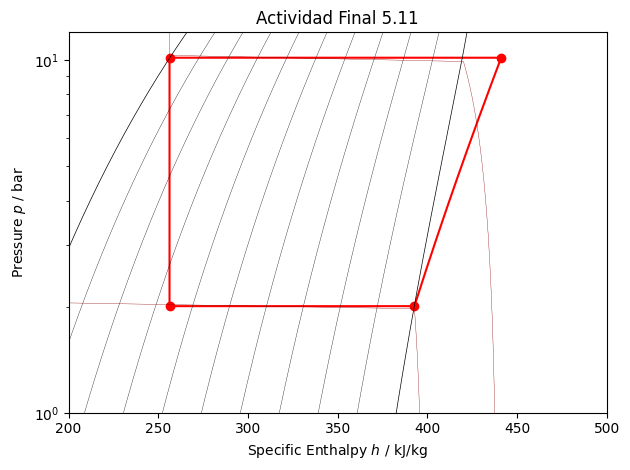

In [26]:
import CoolProp
from CoolProp.Plots import PropertyPlot
from CoolProp.Plots import SimpleCompressionCycle
from CoolProp.CoolProp import PropsSI
pp = PropertyPlot('HEOS::R134a', 'PH', unit_system='EUR')
pp.calc_isolines(CoolProp.iQ, num=11)
Te = T1
Tc = T3
pp.calc_isolines(CoolProp.iT, [Te-273.15,Tc-273.15], num=2)
cycle = SimpleCompressionCycle('HEOS::R134a', 'PH', unit_system='EUR')
cycle.simple_solve_dt(Te, Tc, 0.1, 0.1, 0.7, SI=True)
cycle.steps = 50
sc = cycle.get_state_changes()
import matplotlib.pyplot as plt
plt.close(cycle.figure)
pp.draw_process(sc)
plt.title("Actividad Final 5.11")
plt.xlim(200,500)
plt.ylim(1,12)
pp.show()